#### Exploratory Data Analysis (EDA) is an approach to analysing data sets to summarize their main characteristics, often with visual methods. Following are the different steps involved in EDA :
##### 1. Data Collection
##### 2. Data Cleaning
##### 3. Data Preprocessing
##### 4.Data Visualisation

### General Outline of EDA
##### 1. Our code template shall perform the following steps:
##### 2. Preview data
##### 3. Check total number of entries and column types
##### 4. Check any null values
##### 5. Check duplicate entries
##### 6. Plot distribution of numeric data (univariate and pairwise joint distribution)
##### 7. Plot count distribution of categorical data
##### 8. Analyse time series of numeric data by daily, monthly and yearly frequencies

# Data Cleaning

##### 1.Get Rid of Extra Spaces
##### 2.Select and Treat All Blank Cells
##### 3.Convert Numbers Stored as Text into Numbers
##### 4.Remove Duplicates
##### 5.Highlight Errors
##### 6.Change Text to Lower/Upper/Proper Case
##### 7.Spell Check
##### 8.Delete all Formatting












# Data Preprocessing

###### Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. It includes normalisation and standardisation, transformation, feature extraction and selection, etc. The product of data preprocessing is the final training dataset

# Libraries and Data Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Car Price Prediction.ipynb',
 'framingham.csv',
 'Heart Disease Prediction.ipynb']

In [3]:
data = pd.read_csv('framingham.csv')

In [4]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
data.shape

(4238, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
data.isna().sum()  #there are many row with null values

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
data.dropna(axis=0,how='any',inplace=True)

In [9]:
data.shape

(3656, 16)

In [10]:
data.columns= data.columns.str.lower()
data.rename(columns={'tenyearchd':'heartdisease'},inplace=True)
data.columns

Index(['male', 'age', 'education', 'currentsmoker', 'cigsperday', 'bpmeds',
       'prevalentstroke', 'prevalenthyp', 'diabetes', 'totchol', 'sysbp',
       'diabp', 'bmi', 'heartrate', 'glucose', 'heartdisease'],
      dtype='object')

In [11]:
data.dtypes

male                 int64
age                  int64
education          float64
currentsmoker        int64
cigsperday         float64
bpmeds             float64
prevalentstroke      int64
prevalenthyp         int64
diabetes             int64
totchol            float64
sysbp              float64
diabp              float64
bmi                float64
heartrate          float64
glucose            float64
heartdisease         int64
dtype: object

In [12]:
data.describe()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,heartdisease
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# DATA   VIZUALISATION

([<matplotlib.axis.XTick at 0x2855da86148>,
 <a list of 2 Text xticklabel objects>)

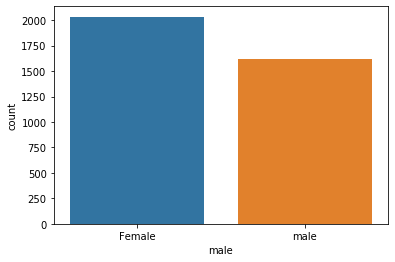

In [13]:
# count of male and female
sns.countplot(data.male)
plt.xticks((0,1),('Female','male'))

### Count of female is higher than male

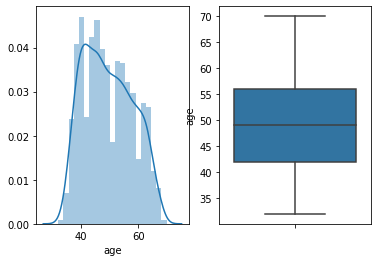

In [14]:
plt.subplot(1,2,1)
sns.distplot(data.age)
plt.subplot(1,2,2)
sns.boxplot(y=data.age)

#### Average age is 49 
#### Spread of age is 35-65

Text(0.5, 1.0, 'Average age of male and female')

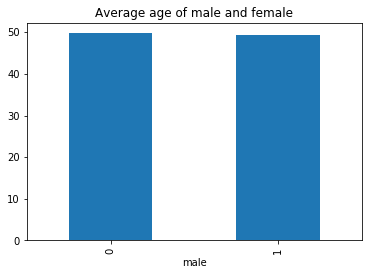

In [15]:
data.groupby(['male'])['age'].mean().plot(kind='bar')
plt.title('Average age of male and female')

Text(0.5, 1.0, 'people with Minimum age who suffering with heartdisease')

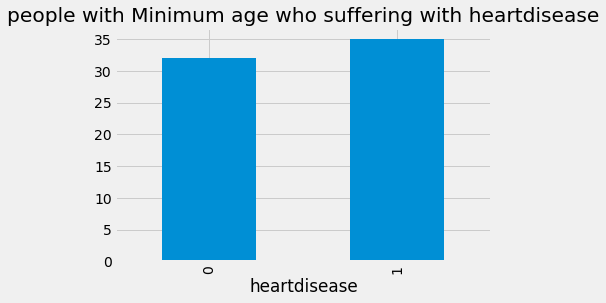

In [16]:
plt.style.use('fivethirtyeight')
data.groupby(['heartdisease'])['age'].min().plot(kind='bar')
plt.title('people with Minimum age who suffering with heartdisease')

#### people with Minimum age who suffering with heartdisease

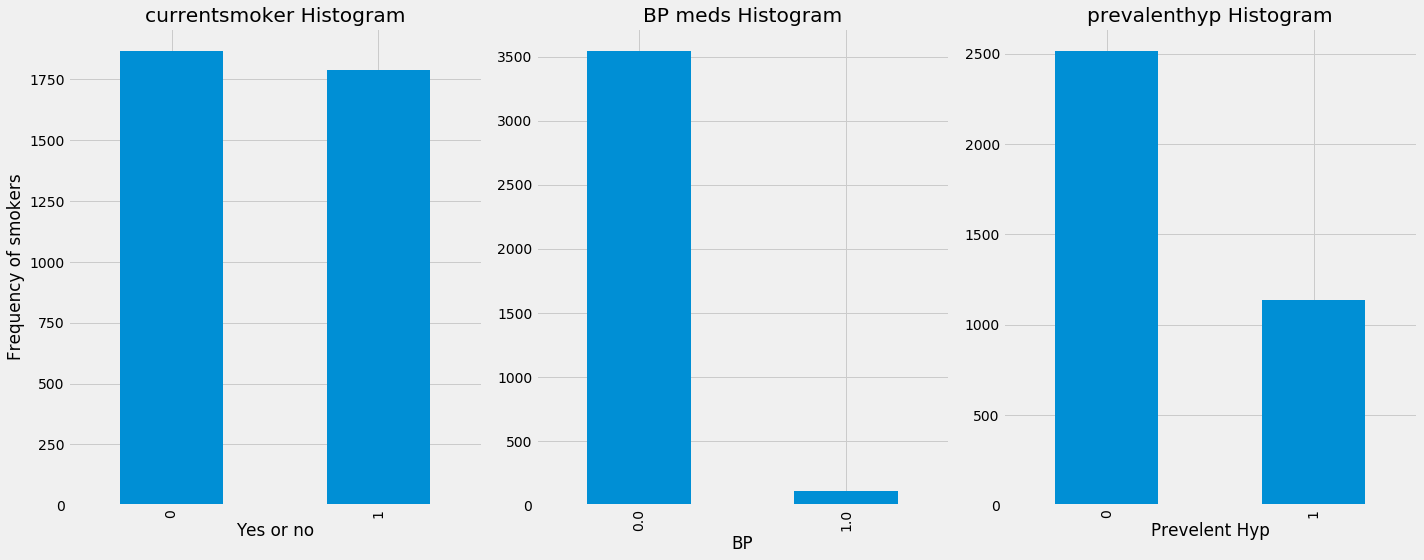

In [17]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt1 = data.currentsmoker.value_counts().plot(kind='bar',title='currentsmoker Histogram')
plt1.set(xlabel='Yes or no',ylabel='Frequency of smokers')

plt.subplot(1,3,2)
plt2 = data.bpmeds.value_counts().plot(kind='bar',title='BP meds Histogram')
plt2.set(xlabel='BP')

plt.subplot(1,3,3)
plt3 = data.prevalenthyp.value_counts().plot(kind='bar',title='prevalenthyp Histogram')
plt3.set(xlabel='Prevelent Hyp')

plt.tight_layout()

Text(0.5, 1.0, 'count of peoplt with and without heartdesease')

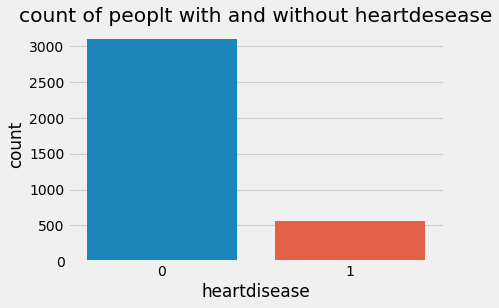

In [18]:
sns.countplot(data.heartdisease)
plt.title('count of peoplt with and without heartdesease')

In [19]:
data.groupby(['heartdisease','diabetes']).count()

male   age  education  currentsmoker  cigsperday  \
heartdisease diabetes                                                     
0            0         3035  3035       3035           3035        3035   
             1           64    64         64             64          64   
1            0          522   522        522            522         522   
             1           35    35         35             35          35   

                       bpmeds  prevalentstroke  prevalenthyp  totchol  sysbp  \
heartdisease diabetes                                                          
0            0           3035             3035          3035     3035   3035   
             1             64               64            64       64     64   
1            0            522              522           522      522    522   
             1             35               35            35       35     35   

                       diabp   bmi  heartrate  glucose  
heartdisease diabetes                                   
0            0          3035  3035       3035     3035  
             1            64    64         64       64  
1            0           522   522        522      522  
             1            35    35         35       35

Text(0.5, 0, 'people with/without heartdisease')

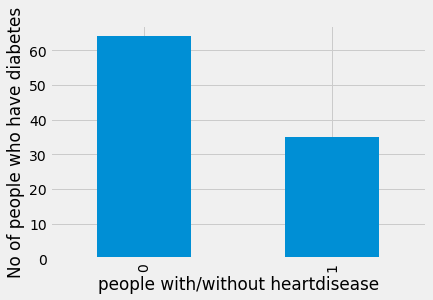

In [20]:
data.groupby(['heartdisease'])['diabetes'].sum().plot(kind='bar')
plt.ylabel('No of people who have diabetes')
plt.xlabel('people with/without heartdisease')

In [21]:
data.select_dtypes(include=['float64'])

,education,cigsperday,bpmeds,totchol,sysbp,diabp,bmi,heartrate,glucose
0,4.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,2.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,20.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0
3,3.0,30.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0
4,3.0,23.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...
4231,3.0,0.0,0.0,187.0,141.0,81.0,24.96,80.0,81.0
4232,1.0,0.0,0.0,176.0,168.0,97.0,23.14,60.0,79.0
4233,1.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.0
4234,3.0,43.0,0.0,207.0,126.5,80.0,19.71,65.0,68.0


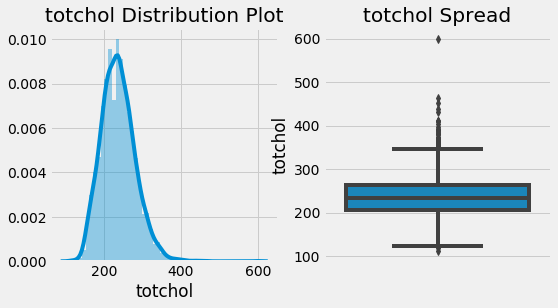

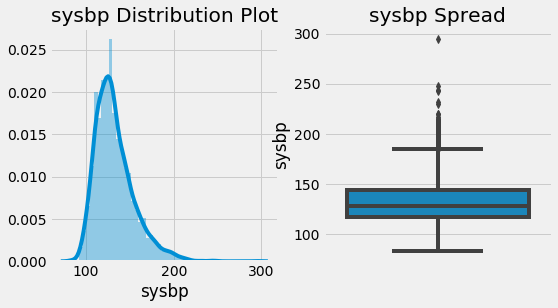

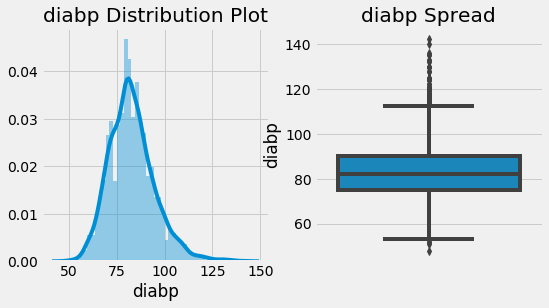

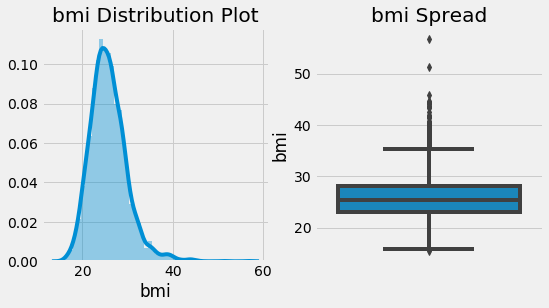

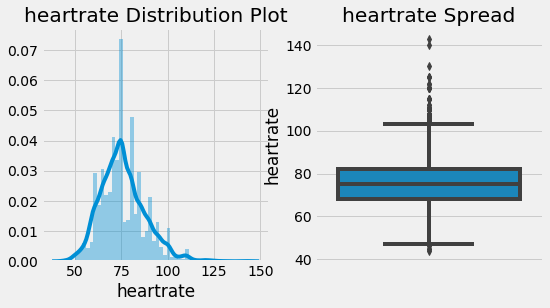

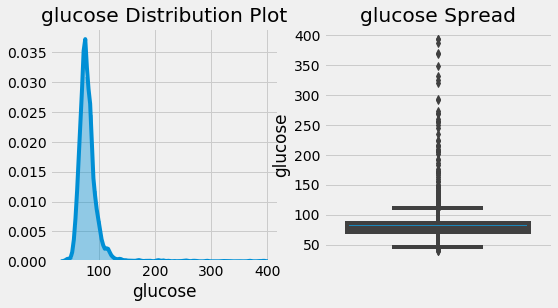

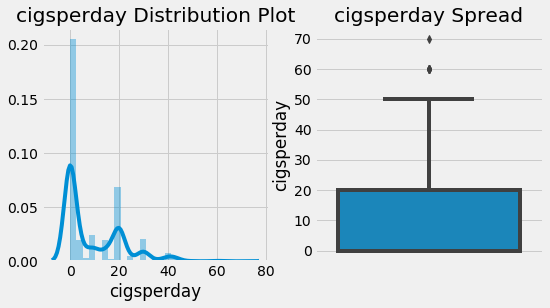

In [22]:
def pp(data,x):
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.title(x+' Distribution Plot')
    sns.distplot(data[x])

    plt.subplot(1,2,2)
    plt.title(x+' Spread')
    sns.boxplot(y=data[x])
    
pp(data,'totchol')
pp(data,'sysbp')
pp(data,'diabp')
pp(data,'bmi')
pp(data,'heartrate')
pp(data,'glucose')
pp(data,'cigsperday')

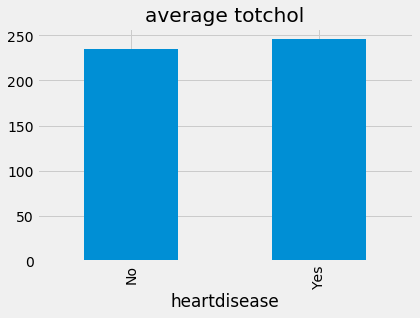

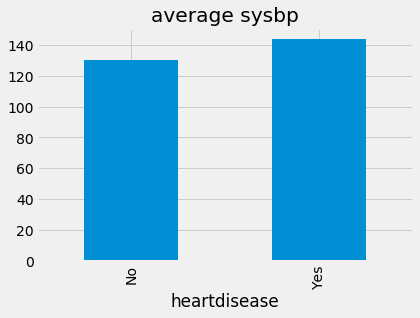

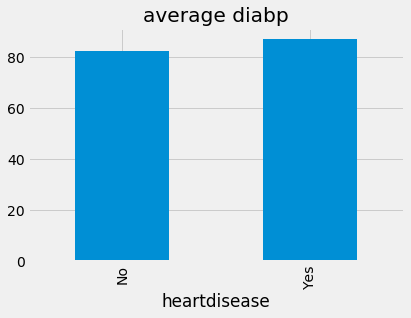

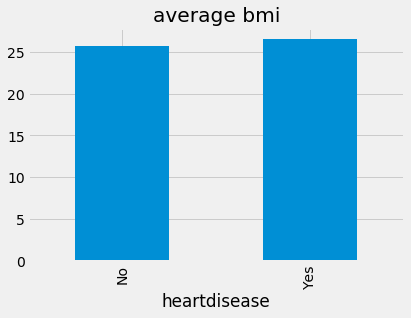

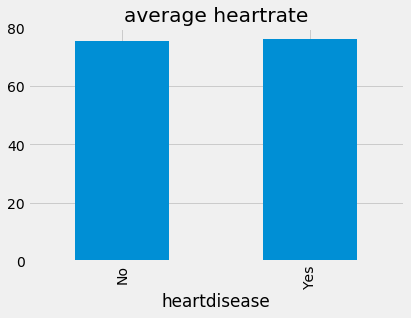

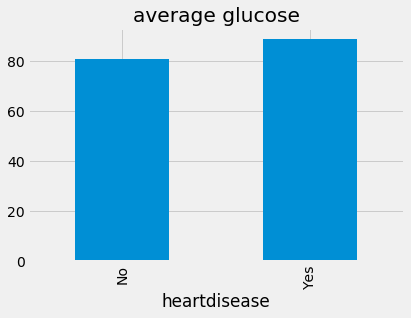

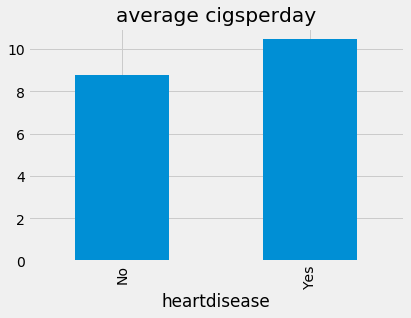

In [23]:
def min_feature(x):
    data.groupby(['heartdisease'])[x].mean().plot(kind='bar',title='average '+x)
    plt.xticks((0,1),('No','Yes'))
    plt.show()
min_feature('totchol')
min_feature('sysbp')
min_feature('diabp')
min_feature('bmi')
min_feature('heartrate')
min_feature('glucose')
min_feature('cigsperday')


Text(0.5, 1.0, 'Avg age of a smoker and non-smoker')

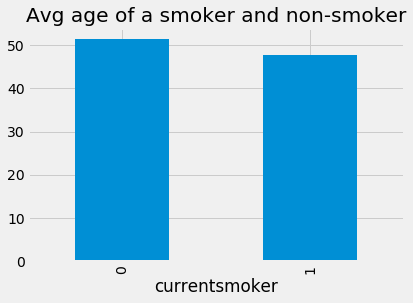

In [24]:
data.groupby(['currentsmoker'])['age'].mean().plot(kind='bar')
plt.title('Avg age of a smoker and non-smoker')

In [25]:
pos = data.loc[data.heartdisease==1]
neg = data.loc[data.heartdisease==0]
pos[:10]

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,heartdisease
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
15,0,38,2.0,1,20.0,0.0,0,1,0,221.0,140.0,90.0,21.35,95.0,70.0,1
17,0,46,2.0,1,20.0,0.0,0,0,0,291.0,112.0,78.0,23.38,80.0,89.0,1
25,1,47,4.0,1,20.0,0.0,0,0,0,294.0,102.0,68.0,24.18,62.0,66.0,1
28,0,61,3.0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
32,0,59,1.0,0,0.0,0.0,0,1,0,209.0,150.0,85.0,20.77,90.0,88.0,1
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,206.0,92.0,21.51,76.0,215.0,1
48,0,63,2.0,1,40.0,0.0,0,0,0,179.0,116.0,69.0,22.15,95.0,75.0,1
50,0,63,1.0,1,3.0,0.0,0,1,0,267.0,156.5,92.5,27.10,60.0,79.0,1


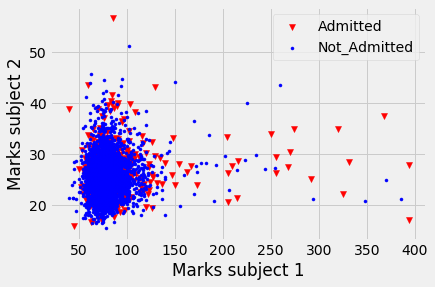

In [26]:
plt.scatter(pos.iloc[:,14],pos.iloc[:,-4],c='r',marker='v',label='Admitted')
plt.scatter(neg.iloc[:,14],neg.iloc[:,-4],c='b',marker='.',label = 'Not_Admitted')
plt.xlabel('Marks subject 1')
plt.ylabel('Marks subject 2')
plt.legend(loc = 'upper right')


Text(0.5, 1, 'Age vs Heartdisease(Yes or No)')

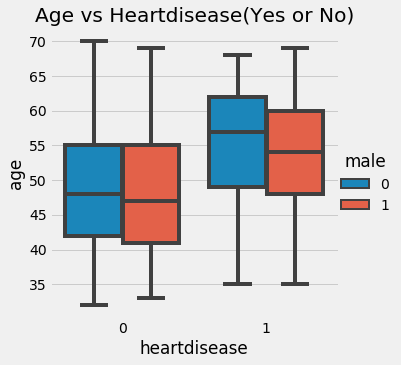

In [27]:
sns.catplot(x='heartdisease',y='age',hue='male',kind='box',data=data)
plt.title('Age vs Heartdisease(Yes or No)')

#### People with high age suffer more than the people with less age

In [28]:
data.head()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,heartdisease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


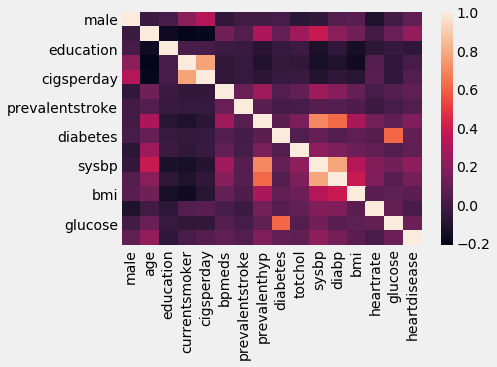

In [29]:
sns.heatmap(data.corr())

Text(0, 0.5, 'count')

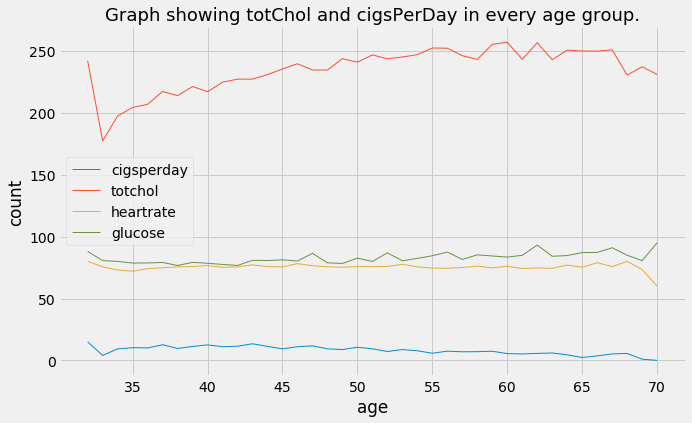

In [30]:
grp1 = data.groupby(['age'])['cigsperday'].mean()
grp2 = data.groupby(['age'])['totchol'].mean()
grp3= data.groupby(['age'])['heartrate'].mean()
grp4 = data.groupby(['age'])['glucose'].mean()
plt.figure(figsize=(10,6))
sns.lineplot(data=grp1,linewidth=1,label='cigsperday')
sns.lineplot(data=grp2,linewidth=1,label='totchol')
sns.lineplot(data=grp3,linewidth=1,label='heartrate')
sns.lineplot(data=grp4,linewidth=1,label='glucose')
plt.title("Graph showing totChol and cigsPerDay in every age group.",{'fontsize':18})
plt.xlabel('age')
plt.ylabel('count')


Text(0.5, 1.0, 'Graph showing which age group has more smokers.')

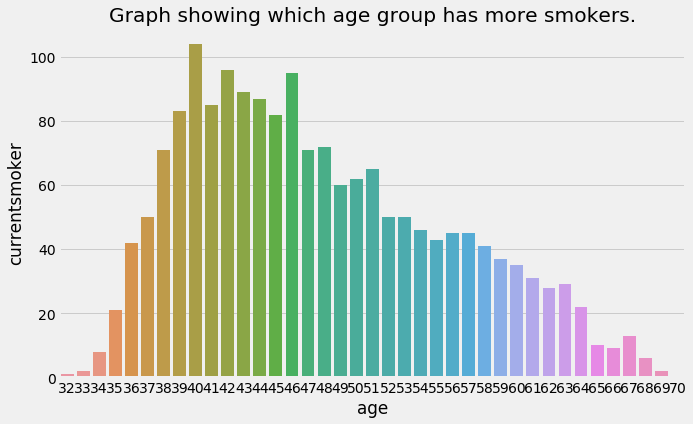

In [31]:
plt.figure(figsize=(10,6))

grp5 = data.groupby(['age'],as_index=False)['currentsmoker'].sum()
grp5.head()
sns.barplot(x=grp5['age'],y=grp5['currentsmoker'])
plt.title("Graph showing which age group has more smokers.")


# DATA PREPARATION

#### importing the required libraries

In [32]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

#### feature selection

In [33]:
X_r = data.drop(['heartdisease'],axis=1)
y_r = data['heartdisease']
X_new = SelectKBest(score_func=chi2,k=15)
fit = X_new.fit(X_r,y_r)

In [34]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X_r.columns)
featurescores=pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns=["features","score"]
featurescores

,features,score
0,male,17.120430
1,age,295.507761
2,education,7.679797
3,currentsmoker,0.686913
4,cigsperday,156.567318
5,bpmeds,28.153003
6,prevalentstroke,8.497823
7,prevalenthyp,82.967184
8,diabetes,31.027987
9,totchol,249.153078


In [35]:
print(featurescores.nlargest(10,'score'))

        features       score
10         sysbp  669.506552
14       glucose  379.583137
1            age  295.507761
9        totchol  249.153078
4     cigsperday  156.567318
11         diabp  142.878574
7   prevalenthyp   82.967184
8       diabetes   31.027987
5         bpmeds   28.153003
0           male   17.120430


In [97]:
#X = data.drop('heartdisease',axis=1)
#y = data.heartdisease
#X=data[["sysbp","glucose","age","totchol","cigsperday","diabp"]]
#y=data["heartdisease"]
X=data[["sysbp","glucose","age","totchol","cigsperday","diabp","prevalenthyp","diabetes","bpmeds","male"]]
y=data["heartdisease"]

### Spliting the data into train and test

In [67]:
X_train_org,X_test_org,y_train,y_test = train_test_split(X,y,test_size=0.3)
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train_org)
X_test = scalar.fit_transform(X_test_org)

print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)

X_train shape:  (2559, 10)
y_train shape:  (2559,)


# Building a Model

# 1. Logistic Regression by Sklearn

In [68]:
logr = LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
print("Score: ",logr.score(X_test,y_test))

Score:  0.8313582497721057


In [69]:
#confusion matrix
print("confusion matrix: \n",confusion_matrix(y_test,y_pred))

confusion matrix: 
 [[901   5]
 [180  11]]


## RidgeClassifier

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
param_grid = {'alpha': [0.01,0.1,1,10,100]}

grid_search = GridSearchCV(RidgeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'alpha': 0.01}


In [41]:
ridge = RidgeClassifier(alpha=0.01)
ridge.fit(X_train, y_train)
print("Score: ",ridge.score(X_test,y_test))
y_pred = ridge.predict(X_test)

Score:  0.8404740200546946


In [42]:
print('confusion matrix:\n ',confusion_matrix(y_test,y_pred))

confusion matrix:
  [[918   2]
 [173   4]]


### Model Evaluation

In [43]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
print("Precision: ",precision_recall_fscore_support(y_test,y_pred))


Precision:  (array([0.84142988, 0.66666667]), array([0.99782609, 0.02259887]), array([0.91297862, 0.04371585]), array([920, 177], dtype=int64))


In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
print(rfc.score(X_test,y_test))
y_pred = rfc.predict(X_test)
print("confusion matrix: ",confusion_matrix(y_test,y_pred))

0.8340929808568824
confusion matrix:  [[898  22]
 [160  17]]


# Handling Imbalanced data
https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/

([<matplotlib.axis.XTick at 0x2856117b348>,
 <a list of 2 Text xticklabel objects>)

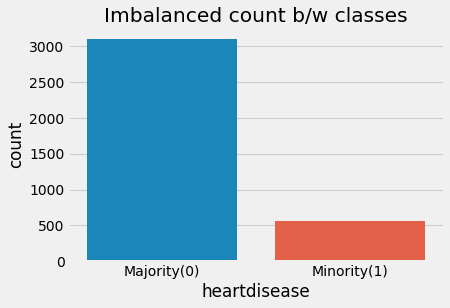

In [45]:
sns.countplot(data.heartdisease)
plt.title('Imbalanced count b/w classes')
plt.xticks((0,1),('Majority(0)','Minority(1)'))

##  Resampling Techniques — Oversample minority class


#### Oversampling can be defined as adding more copies of the minority class

#### Always split into test and train sets BEFORE trying oversampling techniques!

In [46]:
from sklearn.utils import resample

In [47]:
X_sample = data.drop('heartdisease',axis=1)
y_sample = data.heartdisease
Xtrain,Xtest,ytrain,ytest = train_test_split(X_sample,y_sample,test_size=0.25,random_state=27)

#concatenate our training data back together

X_resample = pd.concat([Xtrain,ytrain],axis=1)

#separate minority and majority classes

majority = X_resample[X_resample.heartdisease==0]
minority = X_resample[X_resample.heartdisease==1]
print(majority.shape)

# upsample minority classes

minority_upsample = resample(minority,replace=True,n_samples=len(majority),random_state=27)

#combine majority and minority_upsample 

X_upsampled = pd.concat([majority,minority_upsample],axis=0)

#check new class count

X_upsampled.heartdisease.value_counts()

(2340, 16)


1    2340
0    2340
Name: heartdisease, dtype: int64

In [48]:
print(X_upsampled.shape)
X_upsampled.tail()

(4680, 16)


,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,heartdisease
3759,0,55,3.0,0,0.0,0.0,0,1,0,262.0,122.5,84.0,28.68,66.0,76.0,1
17,0,46,2.0,1,20.0,0.0,0,0,0,291.0,112.0,78.0,23.38,80.0,89.0,1
1341,1,52,1.0,1,25.0,0.0,0,0,0,271.0,121.0,73.0,21.85,70.0,86.0,1
3625,1,54,3.0,1,25.0,0.0,0,0,0,208.0,137.5,82.5,25.58,75.0,63.0,1
2407,0,49,1.0,1,20.0,0.0,0,0,0,323.0,123.5,78.0,22.86,92.0,63.0,1


#### After resampling we have an equal ratio of data points for each class! Let’s try our logistic regression again with the balanced training data.


In [49]:
from sklearn.metrics import r2_score
y_train_org = X_upsampled['heartdisease']
X_train_org = X_upsampled.drop('heartdisease',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X_train_org,y_train_org)

X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

logr = LogisticRegression()

logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
print("Score: ",logr.score(X_train,y_train))

Score:  0.6623931623931624


In [50]:

majority_downsample = resample(majority,replace=False,n_samples=len(minority),random_state=27)

X_downsampled = pd.concat([majority_downsample,minority])

print(X_downsampled.heartdisease.value_counts())

y_train = X_downsampled.heartdisease
X_train = X_downsampled.drop('heartdisease',axis=1)

logr = LogisticRegression()

logr.fit(X_train,y_train)
logr.score(X_test,y_test)

1    402
0    402
Name: heartdisease, dtype: int64


E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5786324786324787

In [52]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [59]:
from sklearn import metrics

smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

print("score: ",metrics.accuracy_score(y_test,smote_pred))
print(metrics.precision_score(y_test,smote_pred))

score:  0.6816192560175055
0.3131868131868132


In [ ]:
pip install imblearn

In [ ]:
!pip install imblearn


In [104]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_sample(X, y)

X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.DataFrame(y_resampled)

undersampled_data = pd.concat([X_resampled, y_resampled], axis=1)
undersampled_data

,sysbp,glucose,age,totchol,cigsperday,diabp,prevalenthyp,diabetes,bpmeds,male,heartdisease
0,122.0,84.0,53,239.0,20.0,82.0,0,0,0.0,1,0
1,150.0,65.0,41,230.0,0.0,101.0,1,0,0.0,1,0
2,138.0,60.0,39,227.0,0.0,89.0,0,0,0.0,0,0
3,131.0,72.0,45,221.0,15.0,84.0,0,0,0.0,1,0
4,159.0,93.0,54,199.0,0.0,102.0,1,0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1109,128.0,75.0,54,245.0,20.0,74.0,0,0,0.0,1,1
1110,153.0,69.0,39,292.0,30.0,100.0,1,0,0.0,1,1
1111,124.0,82.0,62,266.0,0.0,69.0,0,0,0.0,0,1
1112,130.0,78.0,38,305.0,0.0,95.0,0,0,0.0,1,1


In [105]:
X = undersampled_data.drop('heartdisease',axis=1)
y = undersampled_data.heartdisease

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3)
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [106]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
predictions = lr_model.predict(X_test)
print('score: ',lr_model.score(X_test,y_test))

score:  0.6507462686567164


In [101]:
X.shape

(1114, 10)